<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('student_depression_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
# преобразовать категориальные признаки в category
df['id'] = df['id'].astype('int')
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('int')
df['City'] = df['City'].astype('category')
df['Profession'] = df['Profession'].astype('category')

df['Academic Pressure'] = df['Academic Pressure'].astype('int')
df['Work Pressure'] = df['Work Pressure'].astype('int')

df['Study Satisfaction'] = df['Study Satisfaction'].astype('int')
df['Job Satisfaction'] = df['Job Satisfaction'].astype('int')

df['CGPA'] = df['CGPA'].astype('float64')

df['Sleep Duration'] = df['Sleep Duration'].astype('category')
df['Dietary Habits'] = df['Dietary Habits'].astype('category')

df['Degree'] = df['Degree'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')

df['Work/Study Hours'] = df['Work/Study Hours'].astype('int')

''' Обрабатываем использование "?" в колонке '''
df['Financial Stress'][df['Financial Stress']=='?'] = 0
df['Financial Stress'][df['Financial Stress']=='1.0'] = 1
df['Financial Stress'][df['Financial Stress']=='2.0'] = 2
df['Financial Stress'][df['Financial Stress']=='3.0'] = 3
df['Financial Stress'][df['Financial Stress']=='4.0'] = 4
df['Financial Stress'][df['Financial Stress']=='5.0'] = 5
df['Financial Stress'] = df['Financial Stress'].astype('int')

df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')
df['Depression'] = df['Depression'].astype('int')

In [7]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df.CGPA
X = df.drop('CGPA', axis=1)

## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с пропусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [8]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


Есть несколько нуллов в Financial Stress. Так уж и быть, заменим на 0.

In [9]:
# df['Financial Stress'].fillna(0) - Для удобства я уже проставил 0 вместо '?', чтобы сконвертировать в int

Как там наша целевая поживает

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Статы
AVG: 7.66
Med: 7.77
std: 1.47
min: 0.00
max: 10.00


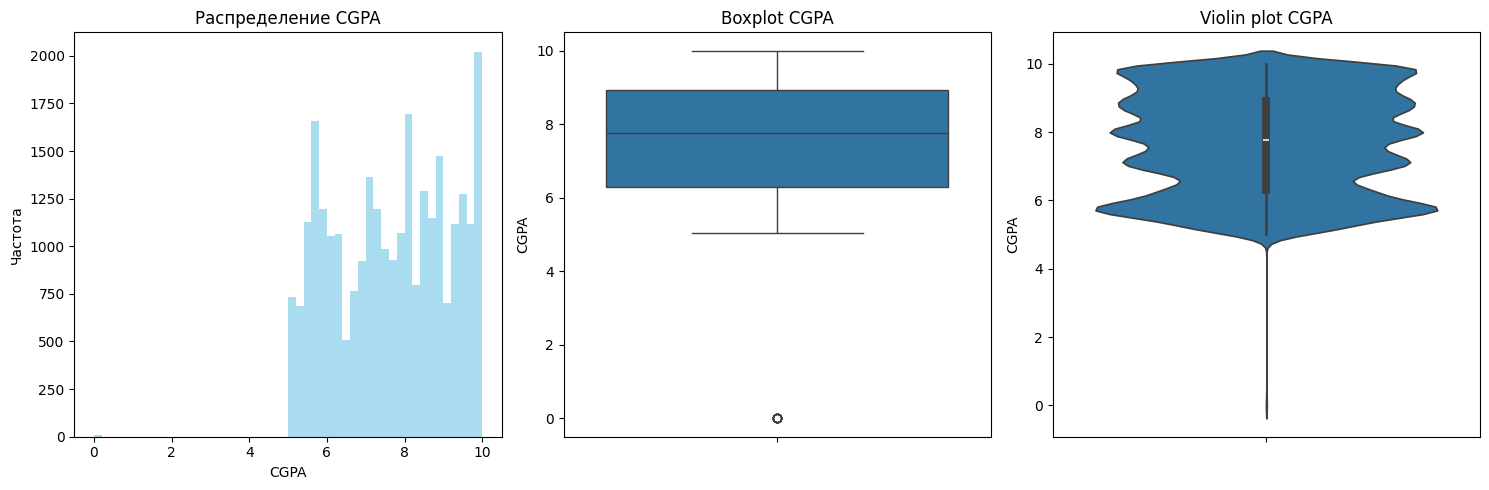

In [11]:
print("Статы")
print(f"AVG: {y.mean():.2f}")
print(f"Med: {y.median():.2f}")
print(f"std: {y.std():.2f}")
print(f"min: {y.min():.2f}")
print(f"max: {y.max():.2f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y, bins=50, alpha=0.7, color='skyblue')
plt.title('Распределение CGPA')
plt.xlabel('CGPA')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.boxplot(y=y)
plt.title('Boxplot CGPA')

plt.subplot(1, 3, 3)
sns.violinplot(y=y)
plt.title('Violin plot CGPA')

plt.tight_layout()
plt.show()

Что за черти вообще не учатся, дырка от бублика в зачетке

Распределение не является нормальным, частоты сконцентрированы у целых значений (6, 7, 8, 9, 10)

Стата по числовым признакам

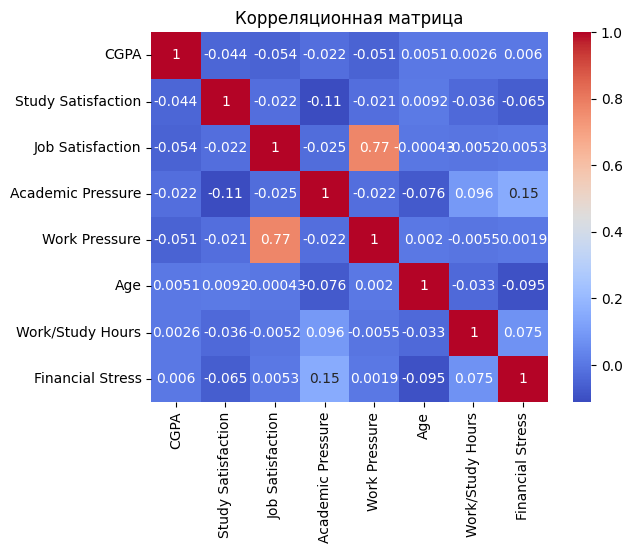

In [12]:
corr_matrix = pd.DataFrame({
    'CGPA': df["CGPA"],
    'Study Satisfaction': df["Study Satisfaction"],
    'Job Satisfaction': df["Job Satisfaction"],
    'Academic Pressure' : df['Academic Pressure'],
    'Work Pressure': df['Work Pressure'],
    'Age': df['Age'],
    'Work/Study Hours' : df['Work/Study Hours'],
    'Financial Stress': df['Financial Stress']
}).corr(method='pearson')

# Визуализация тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Job Satisfaction коррелирует с Work Pressure из-за большого количества 0 в списке.

Теперь по категориальным

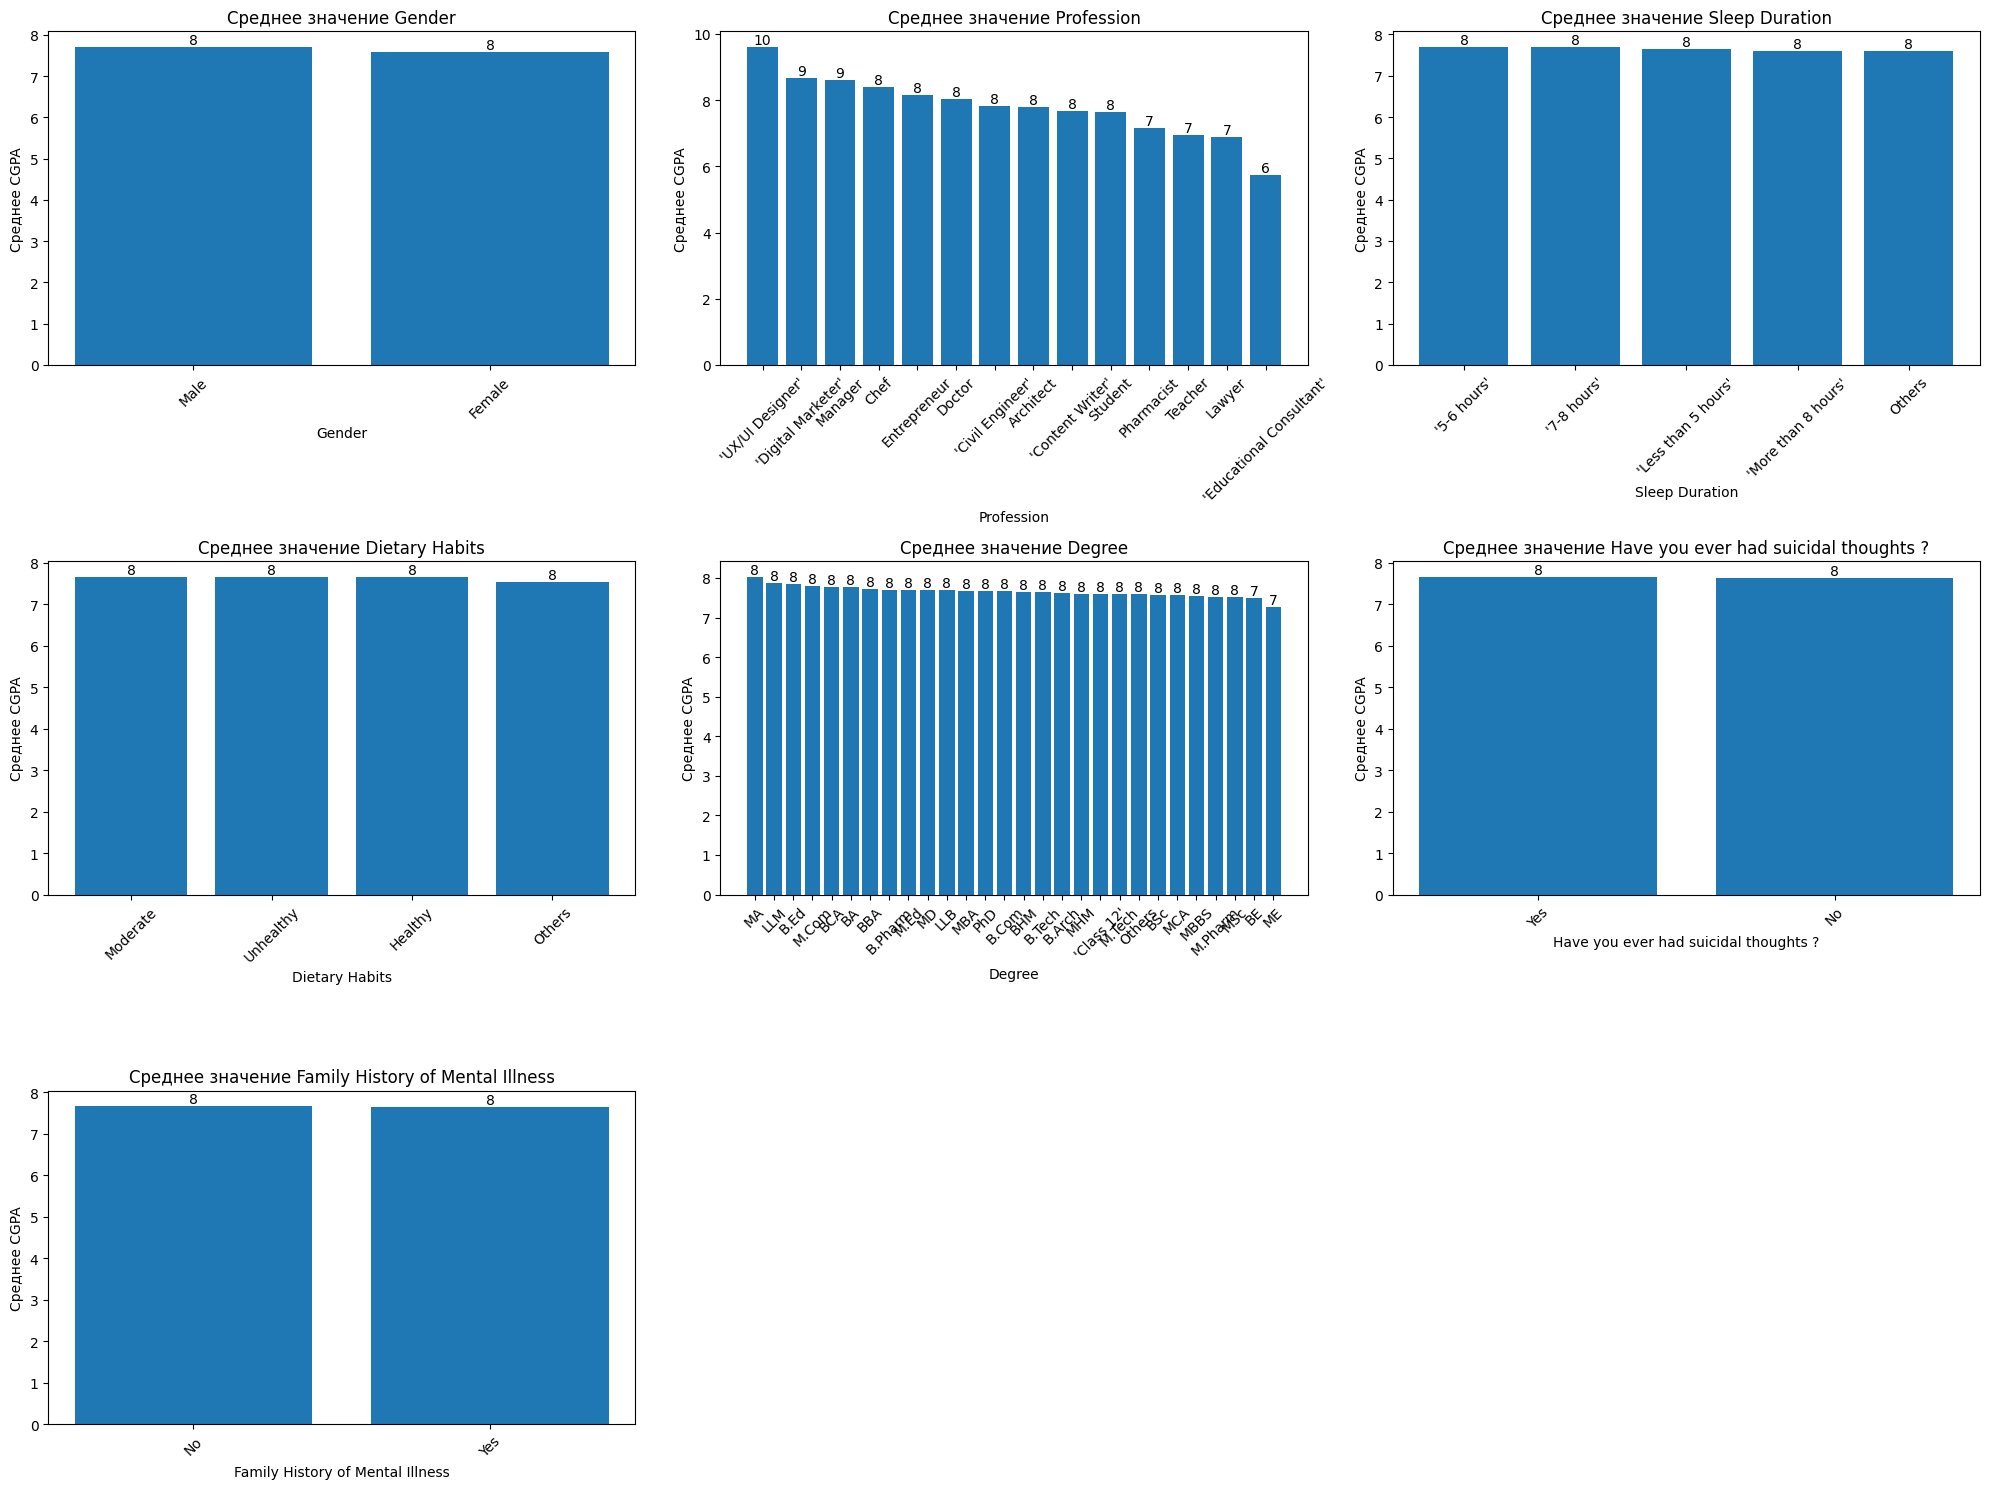

In [13]:
categorical_features = ['Gender', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    grouped = df.groupby(feature)['CGPA'].mean().sort_values(ascending=False)


    bars = axes[i].bar(range(len(grouped)), grouped.values)
    axes[i].set_title(f'Среднее значение {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Среднее CGPA')
    axes[i].set_xticks(range(len(grouped)))
    axes[i].set_xticklabels([str(x) for x in grouped.index], rotation=45)

    # Добавим значения на столбцы
    for bar, value in zip(bars, grouped.values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{value:.0f}', ha='center', va='bottom')

axes[7].set_visible(False)
axes[8].set_visible(False)

plt.tight_layout()
plt.show()

У формошлепов десятки стоят, у манагеров и маркетолухов - 9. Консультанты по образованию (Who???) имеют сильно меньншую оценку. Профессия = это единственная фича, у которой есть различия по среднему, все остальные ровные, как башни-близнецы

В целом, стоит убрать фичи, которые почти не влияют на CGPA из категориальных. Из числовых оставим то, что непосредственно относится к учебе.

In [14]:
categorial_features = ['Profession','Degree']
numeric_features = ['Study Satisfaction',
    'Academic Pressure',
    'Age',
    'Work/Study Hours']
best_features = categorial_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [16]:
from dataclasses import dataclass

@dataclass
class Metrics:
    mae: float
    mse: float
    rmse: float
    r2: float

### Модель 1

##### 1. Преобразование

In [17]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток
 # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

X_model = X.copy()
Y_model = y.copy()

scaler = StandardScaler()
X_nums_names = X.select_dtypes(include=['int']).columns

X_nums_scaled = scaler.fit_transform(X[X_nums_names])
X_nums_scaled = pd.DataFrame(X_nums_scaled, columns=X_nums_names, index=X_model.index)



X_cat_names = df.select_dtypes(include=['category']).columns

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[X_cat_names])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

feature_names = []

for i, feature in enumerate(X_cat_names):
    categories = encoder.categories_[i]
    for category in categories:
        feature_names.append(f"{feature}_{category}")

X_cats_encoded = pd.DataFrame(encoded, columns=feature_names, index=X.index)
X_processed = pd.concat([X_nums_scaled, X_cats_encoded], axis=1)

##### 2. Облучение

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model1 = LinearRegression()


model1.fit(X_processed, Y_model)
y_pred1 = model1.predict(X_processed)

# Метрики
M1 = Metrics(mean_absolute_error(Y_model, y_pred1),
             mean_squared_error(Y_model, y_pred1),
             np.sqrt(mean_squared_error(Y_model, y_pred1)),
             r2_score(Y_model, y_pred1))


print("Очепятки по модели 1")
print(M1)

Очепятки по модели 1
Metrics(mae=1.2510201522604556, mse=2.107310693089374, rmse=np.float64(1.4516579118681419), r2=0.025702443724287538)


Выглядит весьма позорно - ошибаемся более чем на балл средней оценки, модель едва ли чуть лучше предсказания средним.

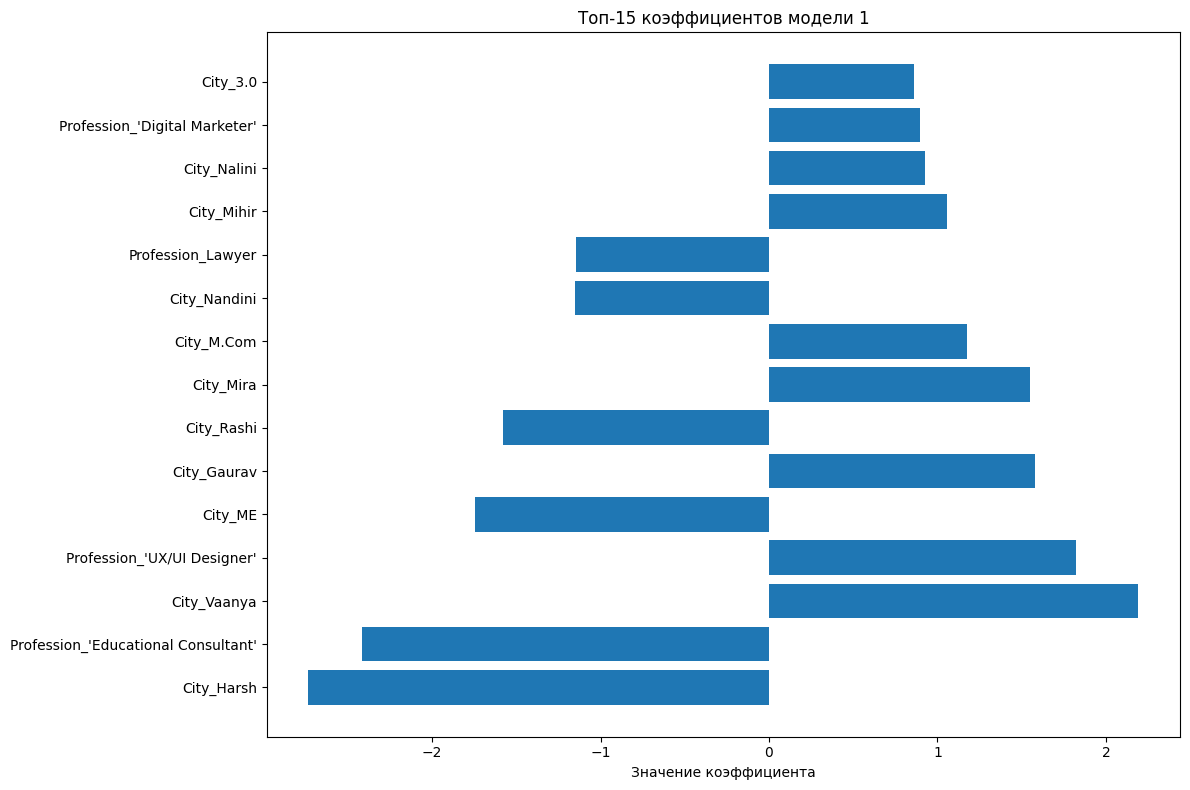

In [20]:
coef_df1 = pd.DataFrame({
    'feature': X_processed.columns,
    'coefficient': model1.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
top_coefs1 = coef_df1.head(15)
plt.barh(range(len(top_coefs1)), top_coefs1['coefficient'])
plt.yticks(range(len(top_coefs1)), top_coefs1['feature'])
plt.title('Топ-15 коэффициентов модели 1')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

Город с названием "[Суровый](https://dictionary.cambridge.org/ru/%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%D1%80%D1%8C/%D0%B0%D0%BD%D0%B3%D0%BB%D0%BE-%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%B8%D0%B9/harsh)" сурово влияет на кэф, оттуда самые тупые студенты. В городе "Вааня" - самые умные Вани. Профессии, у которых были низшие и высшие средние оценки, ожидаемо, тянут модель в соответствующие стороны.

 <small>~~Комплект силовой боевой брони~~</small> <big>Модель 2</big><small>~~, который вы потеряли~~</small> 

##### 3. Разделение

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, Y_model, test_size=0.2, random_state=42
)
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Предсказания
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

##### 4. Метрики

In [22]:
M2 = Metrics(mean_absolute_error(y_train, y_train_pred2),
             mean_squared_error(y_train, y_train_pred2),
             np.sqrt(mean_squared_error(y_train, y_train_pred2)),
             r2_score(y_train, y_train_pred2))


print("Очепятки по модели 2")
print(M1)

Очепятки по модели 2
Metrics(mae=1.2510201522604556, mse=2.107310693089374, rmse=np.float64(1.4516579118681419), r2=0.025702443724287538)


Модель не почувствовала

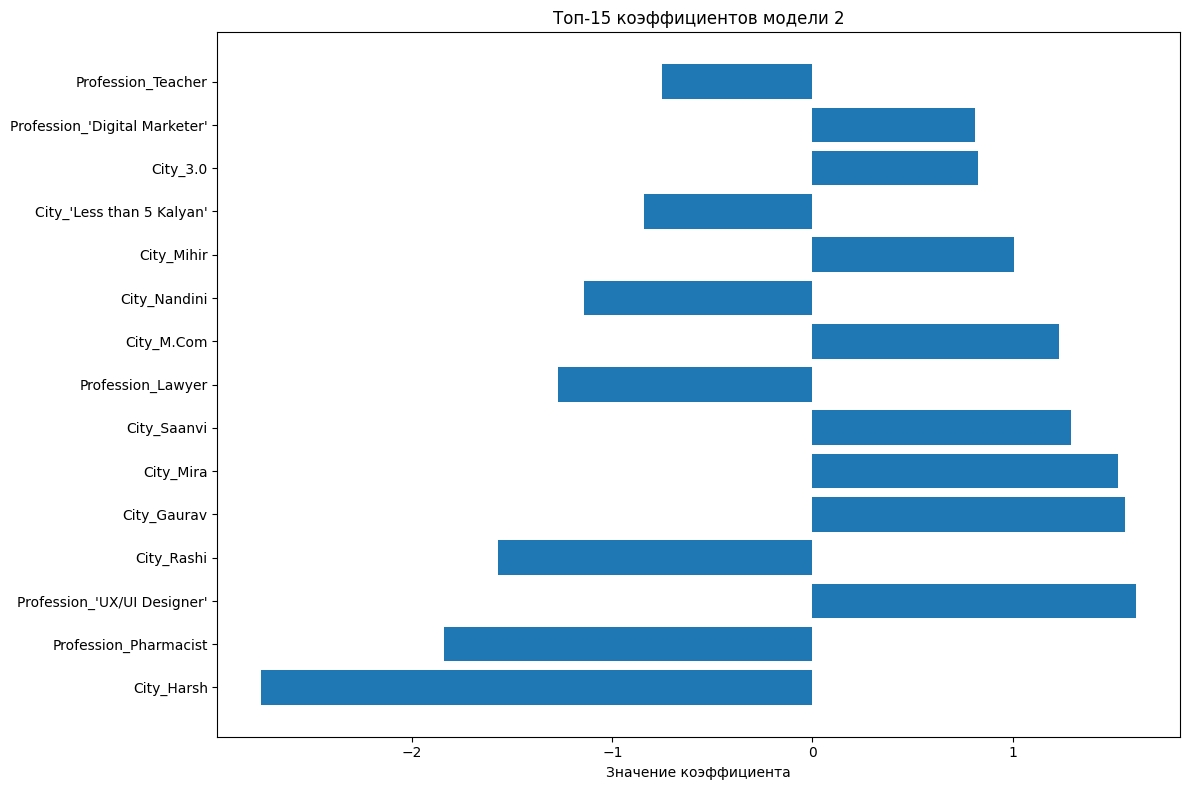

In [23]:
coef_df2 = pd.DataFrame({
    'feature': X_processed.columns,
    'coefficient': model2.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
top_coefs2 = coef_df2.head(15)
plt.barh(range(len(top_coefs2)), top_coefs2['coefficient'])
plt.yticks(range(len(top_coefs2)), top_coefs2['feature'])
plt.title('Топ-15 коэффициентов модели 2')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

То же самое

### Модель 3

#### Преобразование

In [28]:
X_model = X[best_features].copy()
Y_model = y.copy()

scaler = StandardScaler()
X_nums_names = X_model.select_dtypes(include=['int']).columns

X_nums_scaled = scaler.fit_transform(X_model[X_nums_names])
X_nums_scaled = pd.DataFrame(X_nums_scaled, columns=X_nums_names, index=X_model.index)



X_cat_names = X_model.select_dtypes(include=['category']).columns

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X_model[X_cat_names])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

feature_names = []

for i, feature in enumerate(X_cat_names):
    categories = encoder.categories_[i]
    for category in categories:
        feature_names.append(f"{feature}_{category}")

X_cats_encoded = pd.DataFrame(encoded, columns=feature_names, index=X.index)
X_processed = pd.concat([X_nums_scaled, X_cats_encoded], axis=1)

In [ ]:
model3 = LinearRegression()


model3.fit(X_processed, Y_model)
y_pred3 = model3.predict(X_processed)

# Метрики
M3 = Metrics(mean_absolute_error(Y_model, y_pred3),
             mean_squared_error(Y_model, y_pred3),
             np.sqrt(mean_squared_error(Y_model, y_pred3)),
             r2_score(Y_model, y_pred3))

print("Очепятки по модели 3")
print(M3)

Очепятки по модели 3
Metrics(mae=1.265161329825268, mse=2.143817854135381, rmse=np.float64(1.4641782180238105), r2=0.008823661724873921)


Как-будто лучше не стало.

### Модель 4

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

Ellipsis

### Разделение на обучающую, тестовую

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

NameError: name 'X_scaled' is not defined